In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt


In [23]:
#pip install statsmodels


In [24]:
data = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/FeatureEngineered/AKAM_feature_engineeredv2.csv')

In [25]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

In [26]:
non_numeric_cols = ['TICKER', 'CUSIP', 'COMNAM']
numeric_cols = data.columns.difference(non_numeric_cols)

data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Forward-fill missing values
data.fillna(method='ffill', inplace=True)
# Backward-fill if any NaNs remain
data.fillna(method='bfill', inplace=True)




/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_83250/3401022642.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)
/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_83250/3401022642.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True)


In [27]:
data.isnull().sum()

TICKER             0
CUSIP              0
COMNAM             0
RET                0
VOL_CHANGE         0
BA_SPREAD          0
ILLIQUIDITY        0
sprtrn             0
TURNOVER           0
PRC                0
SHROUT             0
MARKET_CAP         0
TRAN_COST          0
ASK                0
BID                0
day_of_week        0
day_of_month       0
month              0
is_month_start     0
is_month_end       0
year               0
week               0
RET_ema_12         0
RET_ema_26         0
RET_skew_10        0
RET_kurtosis_10    0
RET_entropy_10     0
RSI                0
OBV                0
RET_lag_1          0
RET_lag_7          0
RET_lag_14         0
RET_lag_30         0
RET_mean_7d        0
RET_std_7d         0
RET_mean_14d       0
RET_std_14d        0
RET_mean_30d       0
RET_std_30d        0
dtype: int64

In [10]:
endog_vars = ['PRC', 'RET']
exog_vars = data.columns.difference(endog_vars + non_numeric_cols)


In [12]:
model_data = data[endog_vars + list(exog_vars)]


In [13]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    for key, value in result[4].items():
        out[f'Critical Value ({key})'] = value
    print(out.to_string())
    print('')

# Apply ADF test to each variable
for column in model_data.columns:
    adf_test(model_data[column], title=column)


Augmented Dickey-Fuller Test: PRC
Test Statistic            -5.601166
p-value                    0.000001
# Lags Used               34.000000
# Observations          6045.000000
Critical Value (1%)       -3.431432
Critical Value (5%)       -2.862018
Critical Value (10%)      -2.567025

Augmented Dickey-Fuller Test: RET
Test Statistic         -1.329064e+01
p-value                 7.374884e-25
# Lags Used             3.200000e+01
# Observations          6.047000e+03
Critical Value (1%)    -3.431432e+00
Critical Value (5%)    -2.862018e+00
Critical Value (10%)   -2.567024e+00

Augmented Dickey-Fuller Test: ASK
Test Statistic            -5.589161
p-value                    0.000001
# Lags Used               34.000000
# Observations          6045.000000
Critical Value (1%)       -3.431432
Critical Value (5%)       -2.862018
Critical Value (10%)      -2.567025

Augmented Dickey-Fuller Test: BA_SPREAD
Test Statistic            -2.453593
p-value                    0.127178
# Lags Used         

In [14]:
model_data_diff = model_data.diff().dropna()


In [15]:
model = VAR(model_data_diff)
lag_order_results = model.select_order(maxlags=4)
print(lag_order_results.summary())


/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 10-th leading minor of the array is not positive definite

In [16]:
model = VAR(model_data_diff)

# Since we have only 4 data points after differencing, use lag_order=1
results = model.fit(1)
print(results.summary())

/Users/amulya/.pyenv/versions/3.10.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


LinAlgError: 10-th leading minor of the array is not positive definite

# Debugging

In [29]:
# Assuming 'model_data' is your DataFrame with all the data
endog = model_data[['PRC']]

# Define exogenous variables by selecting them from 'model_data'
exog_vars = [['VOL_CHANGE', 'BA_SPREAD', 'ILLIQUIDITY', 'TURNOVER', 'MARKET_CAP', 'TRAN_COST', 'ASK', 'BID', 'day_of_week',
             'day_of_month', 'month', 'is_month_start', 'is_month_end', 'year', 'week', 'RET_ema_12', 'RET_ema_26',
             'RET_skew_10', 'RET_kurtosis_10', 'RET_entropy_10', 'RSI', 'OBV', 'RET_lag_1', 'RET_lag_7', 'RET_lag_14',
             'RET_lag_30', 'RET_mean_7d', 'RET_std_7d', 'RET_mean_14d', 'RET_std_14d', 'RET_mean_30d', 'RET_std_30d']]

exog = model_data[exog_vars]

# Align the datasets if necessary
endog = endog.iloc[1:]
exog = exog.iloc[1:]



TypeError: list indices must be integers or slices, not list

# Correlation Matrix

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

In [31]:
df = pd.read_csv('/Users/amulya/Desktop/Capstone/DSCI-601-Amy/Data/FeatureEngineered/AKAM_feature_engineeredv2.csv')

In [32]:

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.sort_index(inplace=True)


In [33]:
# Exclude non-numeric columns
non_numeric_cols = ['TICKER', 'CUSIP', 'COMNAM']
numeric_cols = df.columns.difference(non_numeric_cols)

# Convert columns to numeric, coerce errors to NaN
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Handle missing values
df[numeric_cols] = df[numeric_cols].fillna(method='ffill').fillna(method='bfill')


/var/folders/69/00tjyfg95_d37pp6ql47yf9h0000gn/T/ipykernel_83250/1205026940.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[numeric_cols] = df[numeric_cols].fillna(method='ffill').fillna(method='bfill')


In [34]:
# Define target variables
target_vars = ['PRC', 'RET']

# Define feature variables (exclude target variables and non-numeric columns)
feature_vars = df.columns.difference(target_vars + non_numeric_cols)

# Create a DataFrame with features and targets
data = df[target_vars + list(feature_vars)]


In [35]:
# Compute the correlation matrix
corr_matrix = data.corr()


In [36]:
print("Correlation Matrix:")
print(corr_matrix)


Correlation Matrix:
                      PRC       RET       ASK  BA_SPREAD       BID  \
PRC              1.000000  0.011719  0.999997  -0.264877  0.999997   
RET              0.011719  1.000000  0.011725  -0.005018  0.011708   
ASK              0.999997  0.011725  1.000000  -0.264450  0.999996   
BA_SPREAD       -0.264877 -0.005018 -0.264450   1.000000 -0.265253   
BID              0.999997  0.011708  0.999996  -0.265253  1.000000   
ILLIQUIDITY      0.015344  0.311549  0.015319  -0.090073  0.015335   
MARKET_CAP       0.936361  0.009467  0.936121  -0.342871  0.936498   
OBV             -0.091382  0.025103 -0.091841  -0.466617 -0.091130   
RET_ema_12       0.081180  0.505252  0.081280  -0.047687  0.081203   
RET_ema_26       0.179352  0.306803  0.179584  -0.052313  0.179350   
RET_entropy_10   0.023797 -0.009714  0.023802  -0.067410  0.023795   
RET_kurtosis_10  0.000551  0.008867  0.000519  -0.071641  0.000591   
RET_lag_1        0.017026  0.055536  0.017002  -0.028186  0.016981   


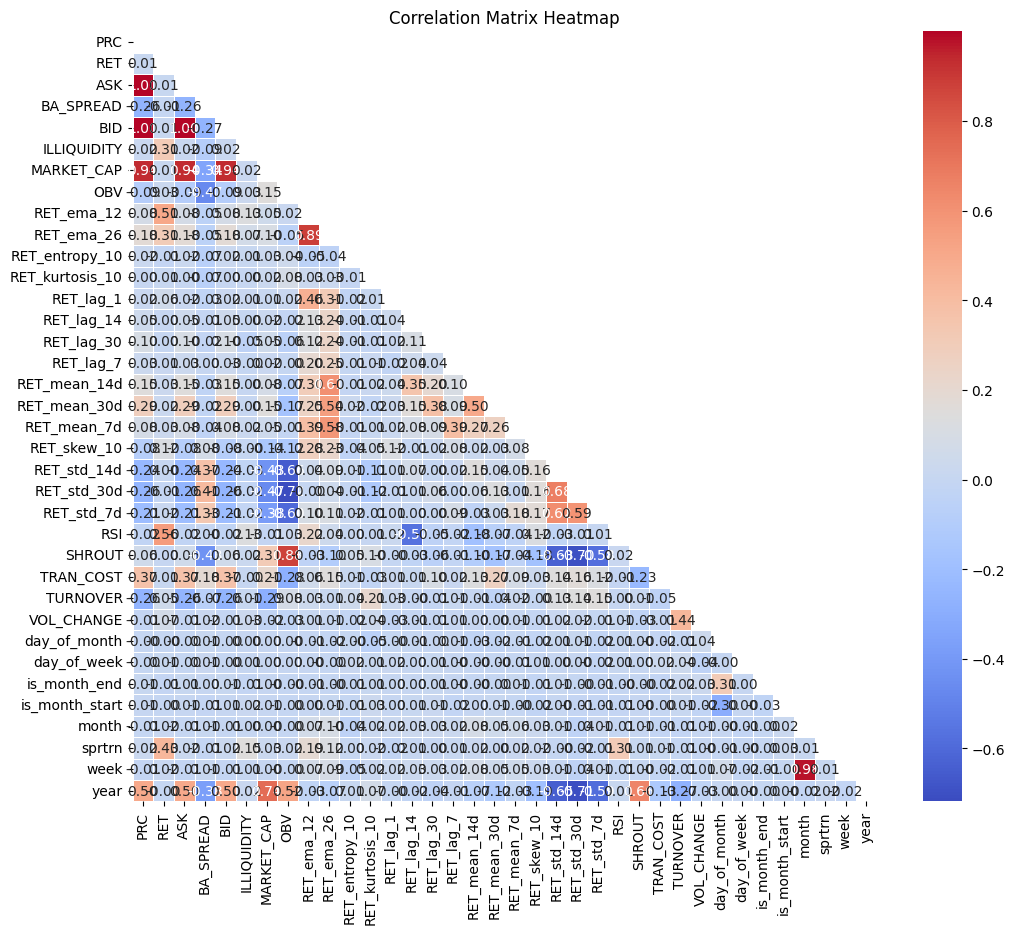

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configure the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap='coolwarm', linewidths=0.5)

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [41]:
# Get the correlation of each feature with the target variables
corr_with_prc = corr_matrix['PRC'].drop('PRC').sort_values(ascending=False)
corr_with_ret = corr_matrix['RET'].drop('RET').sort_values(ascending=False)

print("\nCorrelation with PRC:")
print(corr_with_prc)

print("\nCorrelation with RET:")
print(corr_with_ret)



Correlation with PRC:
BID                0.999997
ASK                0.999997
MARKET_CAP         0.936361
year               0.497955
TRAN_COST          0.367131
RET_mean_30d       0.285205
RET_ema_26         0.179352
RET_mean_14d       0.153279
RET_lag_30         0.095120
RET_mean_7d        0.081598
RET_ema_12         0.081180
SHROUT             0.055639
RET_lag_14         0.045181
RET_lag_7          0.026989
RET_entropy_10     0.023797
sprtrn             0.022357
RET_lag_1          0.017026
ILLIQUIDITY        0.015344
RET                0.011719
is_month_end       0.007037
is_month_start     0.005968
RET_kurtosis_10    0.000551
day_of_week       -0.000127
day_of_month      -0.000187
month             -0.006268
week              -0.006871
VOL_CHANGE        -0.010782
RSI               -0.023957
RET_skew_10       -0.081498
OBV               -0.091382
RET_std_7d        -0.208429
RET_std_14d       -0.237150
RET_std_30d       -0.255977
TURNOVER          -0.264196
BA_SPREAD         -0.2648

In [42]:
# For PRC
print("\nTop features correlated with PRC:")
print(corr_with_prc.head())

# For RET
print("\nTop features correlated with RET:")
print(corr_with_ret.head())



Top features correlated with PRC:
BID           0.999997
ASK           0.999997
MARKET_CAP    0.936361
year          0.497955
TRAN_COST     0.367131
Name: PRC, dtype: float64

Top features correlated with RET:
RSI            0.561566
RET_ema_12     0.505252
sprtrn         0.432495
ILLIQUIDITY    0.311549
RET_ema_26     0.306803
Name: RET, dtype: float64


## Mutual Information

In [43]:
from sklearn.feature_selection import mutual_info_regression

# Prepare the data
X = df[feature_vars]
y_prc = df['PRC']
y_ret = df['RET']

# Compute mutual information for PRC
mi_prc = mutual_info_regression(X, y_prc)
mi_prc_series = pd.Series(mi_prc, index=feature_vars).sort_values(ascending=False)
print("\nMutual Information with PRC:")
print(mi_prc_series)

# Compute mutual information for RET
mi_ret = mutual_info_regression(X, y_ret)
mi_ret_series = pd.Series(mi_ret, index=feature_vars).sort_values(ascending=False)
print("\nMutual Information with RET:")
print(mi_ret_series)



Mutual Information with PRC:
BID                6.823594
ASK                6.816444
MARKET_CAP         4.297647
BA_SPREAD          2.664747
SHROUT             2.359295
OBV                2.143018
year               1.781188
RET_std_30d        1.113999
RET_std_14d        0.737861
week               0.709554
ILLIQUIDITY        0.490225
RET_std_7d         0.486587
month              0.433593
RET_mean_30d       0.393044
RET_ema_26         0.348408
TURNOVER           0.303236
RET_ema_12         0.215493
RET_mean_14d       0.213355
TRAN_COST          0.191767
RET_skew_10        0.182335
RET_mean_7d        0.162294
RET_kurtosis_10    0.153829
RET_lag_14         0.115422
RET_lag_30         0.107803
RET_lag_7          0.106333
RET_lag_1          0.099238
sprtrn             0.036878
RET_entropy_10     0.022536
RSI                0.022277
VOL_CHANGE         0.018900
day_of_month       0.000000
day_of_week        0.000000
is_month_end       0.000000
is_month_start     0.000000
dtype: float64

Mu

## Feature Importance

In [44]:
from sklearn.ensemble import RandomForestRegressor

# For PRC
rf_prc = RandomForestRegressor(n_estimators=100, random_state=42)
rf_prc.fit(X, y_prc)
feature_importances_prc = pd.Series(rf_prc.feature_importances_, index=feature_vars).sort_values(ascending=False)
print("\nFeature Importances for PRC (Random Forest):")
print(feature_importances_prc)

# For RET
rf_ret = RandomForestRegressor(n_estimators=100, random_state=42)
rf_ret.fit(X, y_ret)
feature_importances_ret = pd.Series(rf_ret.feature_importances_, index=feature_vars).sort_values(ascending=False)
print("\nFeature Importances for RET (Random Forest):")
print(feature_importances_ret)



Feature Importances for PRC (Random Forest):
BID                4.960679e-01
ASK                4.375194e-01
SHROUT             6.129641e-02
MARKET_CAP         4.799397e-03
RET_mean_7d        5.705704e-05
RET_mean_14d       4.405458e-05
RSI                3.226125e-05
RET_lag_14         2.363804e-05
day_of_month       2.260035e-05
RET_ema_26         1.933543e-05
RET_std_7d         1.511914e-05
TRAN_COST          1.310045e-05
RET_lag_1          1.016296e-05
RET_lag_30         8.827810e-06
TURNOVER           7.749140e-06
sprtrn             6.871045e-06
VOL_CHANGE         6.489211e-06
day_of_week        5.543646e-06
RET_skew_10        5.152965e-06
RET_lag_7          4.932762e-06
RET_kurtosis_10    4.799312e-06
BA_SPREAD          4.456022e-06
RET_std_14d        4.294615e-06
RET_ema_12         4.254310e-06
OBV                4.168631e-06
week               3.643211e-06
RET_std_30d        3.592872e-06
RET_mean_30d       2.636288e-06
is_month_end       1.312643e-06
year               5.07528